# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective is to develop a predictive model for used car prices based on various vehicle attributes. This involves conducting exploratory data analysis (EDA) to identify significant features, performing feature engineering where necessary, and implementing regression techniques to quantify the impact of each variable on the target variable (price).

The model will be evaluated using metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Square Error (RMSE) to ensure its predictive accuracy. Additionally, feature importance analysis will be conducted to rank the factors influencing price, enabling the prioritization of key drivers.

The final output will be a robust model that can predict used car prices and provide insights into the most influential factors, supporting data-driven inventory and pricing decisions for the dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

In [101]:

print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()

Dataset shape: (426880, 18)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state

In [102]:
print("\nFirst few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [103]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [104]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


In [105]:
# Analyze categorical variables
cat_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
for col in cat_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(normalize=True).head())


Unique values in manufacturer:
manufacturer
ford         0.173458
chevrolet    0.134554
toyota       0.083576
honda        0.051973
nissan       0.046592
Name: proportion, dtype: float64

Unique values in model:
model
f-150             0.018997
silverado 1500    0.012192
1500              0.009988
camry             0.007436
silverado         0.007170
Name: proportion, dtype: float64

Unique values in condition:
condition
good         0.480489
excellent    0.401411
like new     0.083782
fair         0.026779
new          0.005163
Name: proportion, dtype: float64

Unique values in cylinders:
cylinders
6 cylinders     0.377882
4 cylinders     0.311563
8 cylinders     0.289171
5 cylinders     0.006870
10 cylinders    0.005839
Name: proportion, dtype: float64

Unique values in fuel:
fuel
gas         0.840379
other       0.072494
diesel      0.070923
hybrid      0.012197
electric    0.004006
Name: proportion, dtype: float64

Unique values in title_status:
title_status
clean      0.967702
re

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [156]:
# Remove rows with missing or unrealistic values
df = df[(df['price'].notna()) & (df['price'] > 0) & (df['price'] < 1000000)]
df = df[(df['year'].notna()) & (df['year'] > 1900) & (df['year'] <= 2023)]
df = df[(df['odometer'].notna()) & (df['odometer'] >= 0) & (df['odometer'] < 1000000)]

In [157]:
# Feature Engineering
df['age'] = 2023 - df['year']
df['price_per_mile'] = df['price'] / (df['odometer'] + 1)

In [158]:
# Handle categorical variables
for col in cat_columns:
    df[col] = df[col].fillna('Unknown')

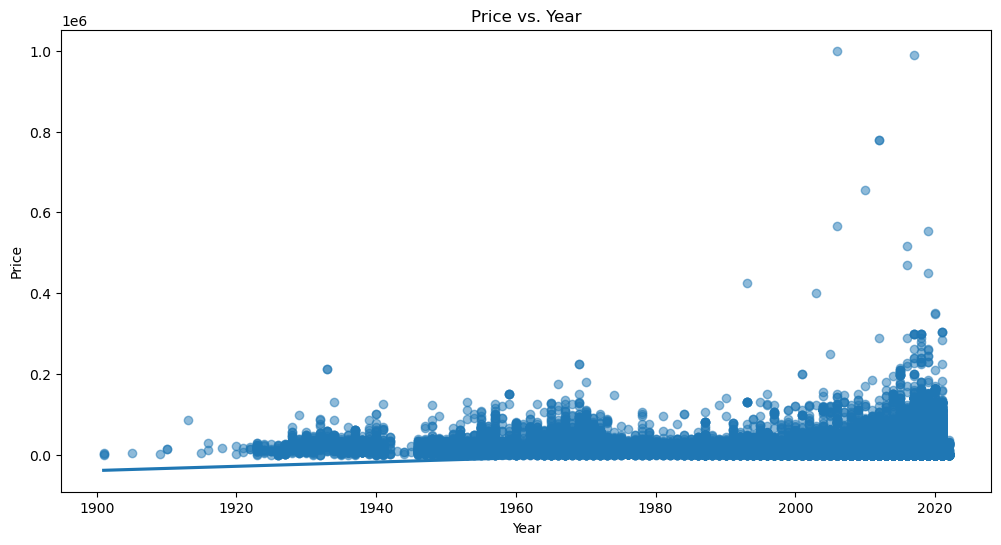

In [154]:
# Scatter plot of price vs. year with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='year', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

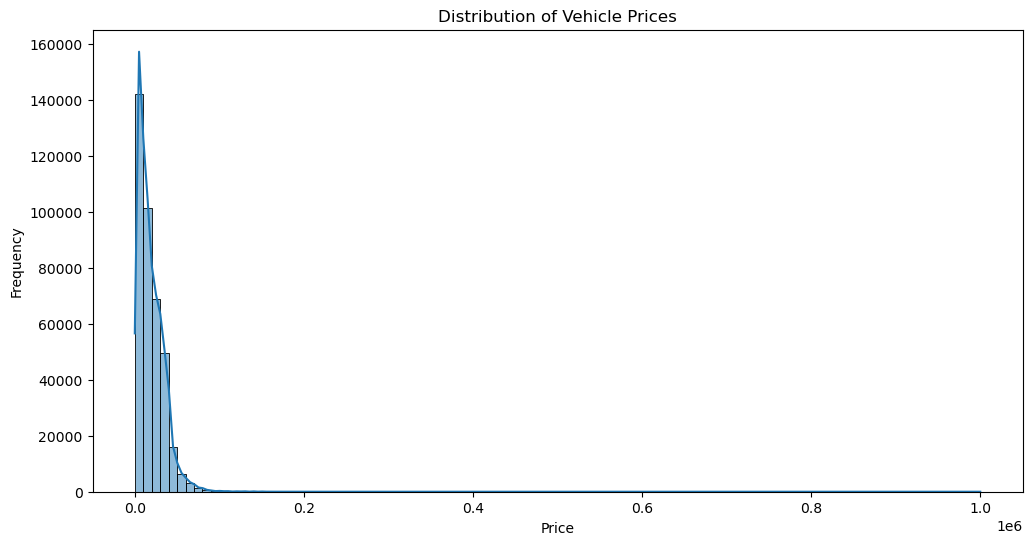

In [153]:
# Visualize price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

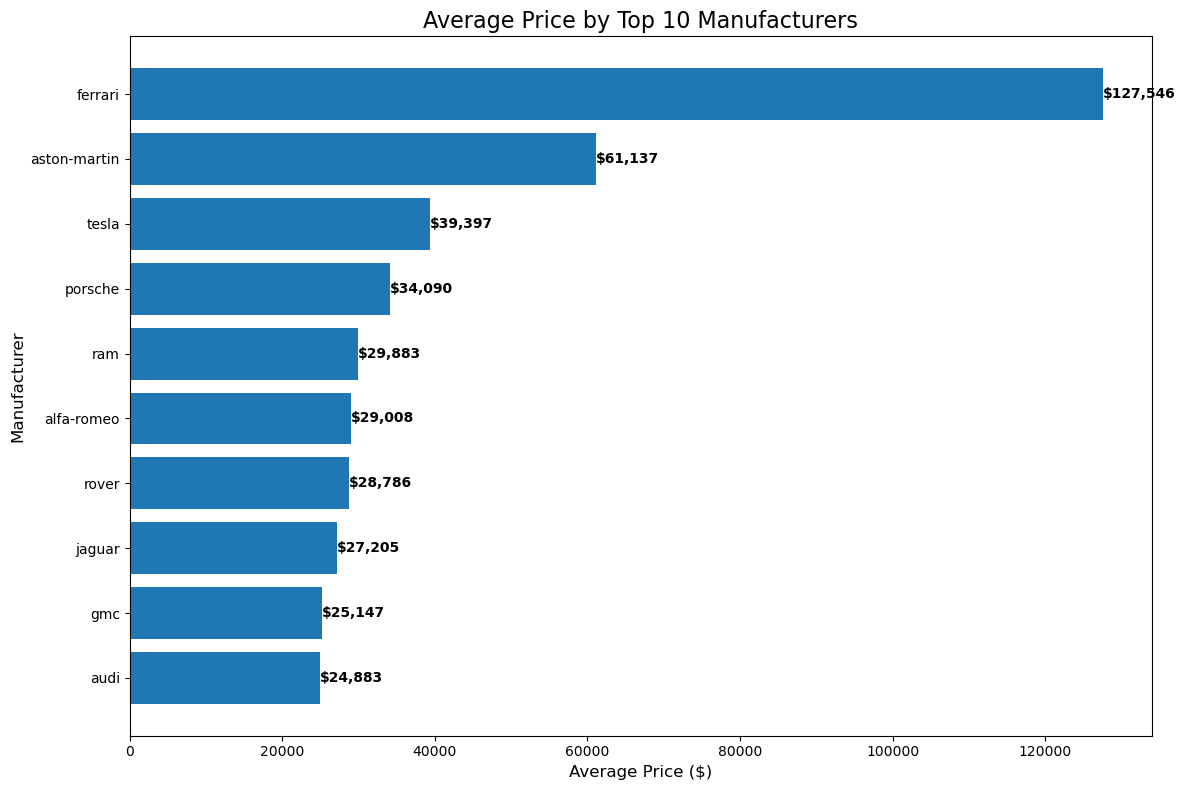

In [160]:
# Average Price by Manufacturer (Top 10)
top_10_manufacturers = df.groupby('manufacturer')['price'].mean().nlargest(10).sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_manufacturers.index, top_10_manufacturers.values)

# Customize the chart
plt.title('Average Price by Top 10 Manufacturers', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'${width:,.0f}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

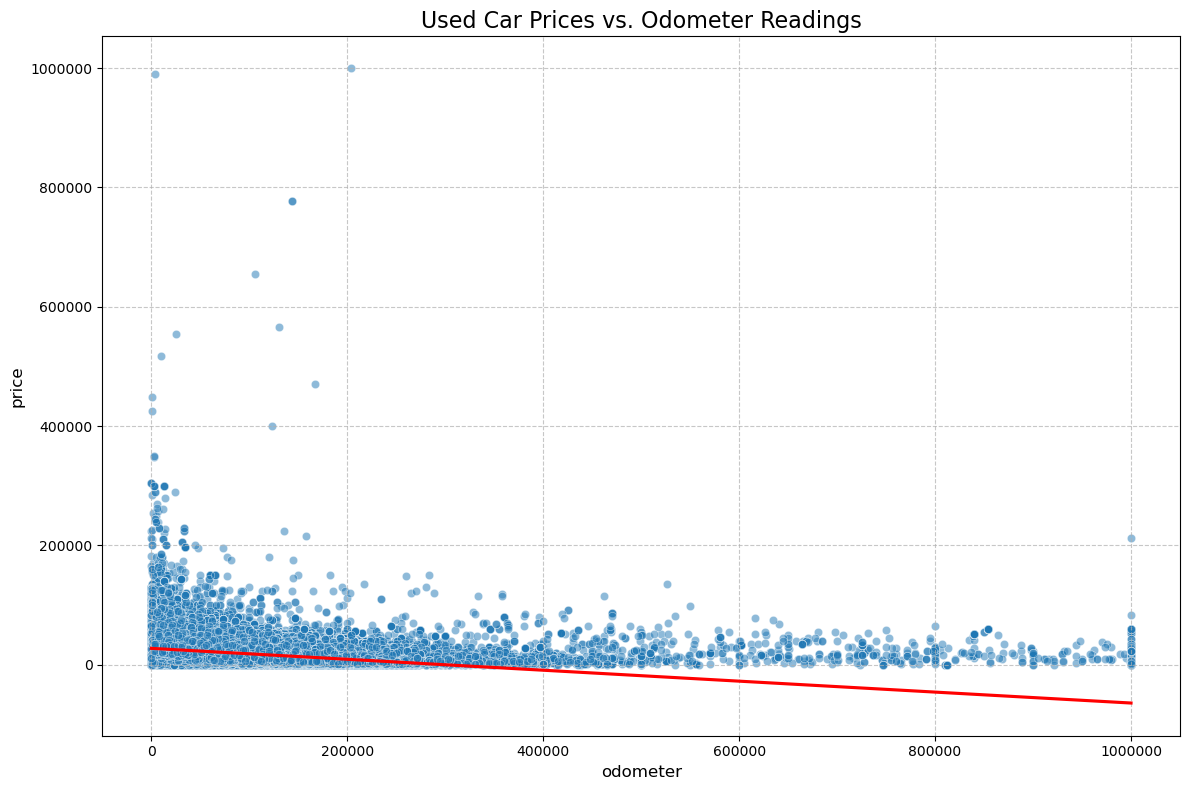

In [151]:
# Odometer vs. Price Scatter Plot

plt.figure(figsize=(12, 8))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)

# Customize the chart
plt.title('Used Car Prices vs. Odometer Readings', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Add a trend line
sns.regplot(x='odometer', y='price', data=df, scatter=False, color='red')

# Improve readability
plt.ticklabel_format(style='plain', axis='both')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

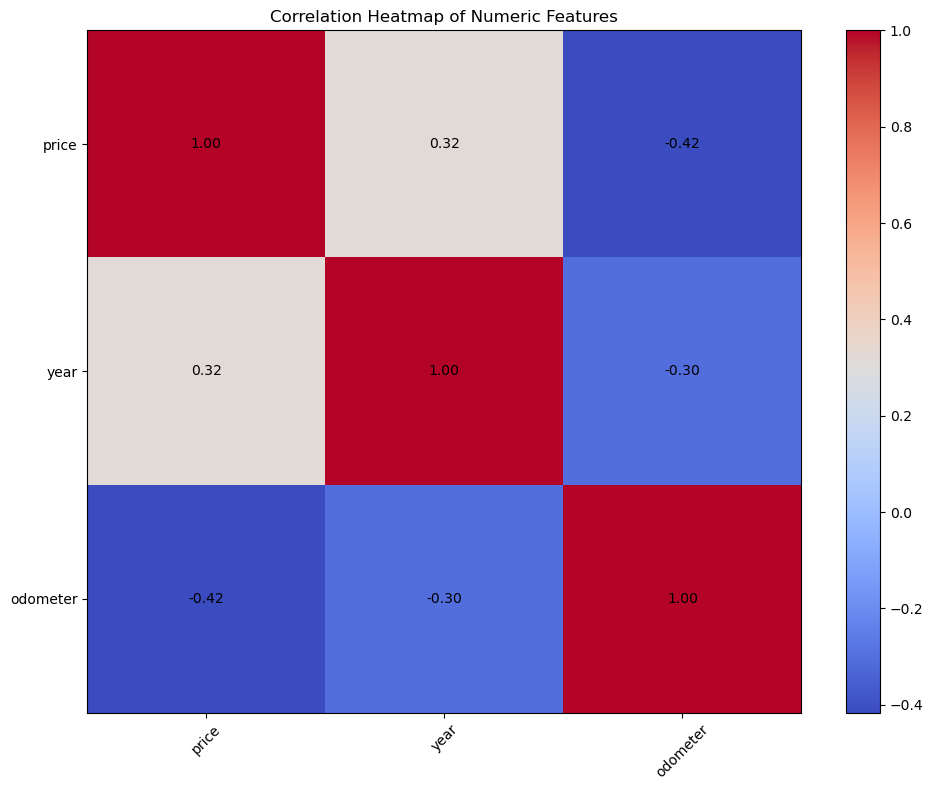

In [150]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['price', 'year', 'odometer']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Numeric Features')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

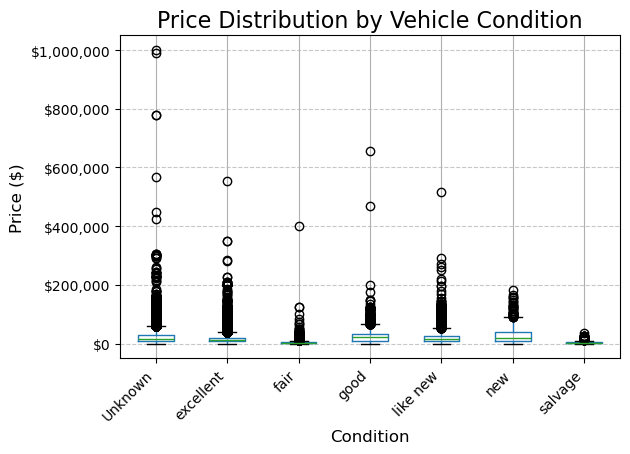

In [149]:
# Box Plot of Prices by Condition
plt.figure(figsize=(12, 6))
df.boxplot(column='price', by='condition')

plt.title('Price Distribution by Vehicle Condition', fontsize=16)
plt.suptitle('')  # This removes the automatic suptitle
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Condition', fontsize=12)

# Format y-axis ticks as currency
def currency_formatter(x, p):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [113]:
# Limit categories in 'model' to top 100 most frequent
top_100_models = df['model'].value_counts().nlargest(100).index
df['model'] = df['model'].where(df['model'].isin(top_100_models), 'Other')

In [114]:
# Prepare features for modeling
numeric_features = ['year', 'odometer', 'age', 'price_per_mile']
categorical_features = cat_columns

In [115]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [116]:
# Prepare the features (X) and target (y)
X = df[numeric_features + categorical_features]
y = df['price']

In [117]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [119]:
def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    rmse_scores = np.sqrt(mse_scores)
    return rmse_scores.mean(), rmse_scores.std()

def print_evaluation(model_name, rmse_mean, rmse_std):
    print(f"{model_name} - RMSE: {rmse_mean:.2f} (+/- {rmse_std:.2f})")


In [120]:
# Linear Regression
lr_model = LinearRegression()
lr_rmse_mean, lr_rmse_std = evaluate_model(lr_model, X_train_processed, y_train)
print_evaluation("Linear Regression", lr_rmse_mean, lr_rmse_std)

Linear Regression - RMSE: 11296.47 (+/- 385.31)


In [121]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_rmse_mean, ridge_rmse_std = evaluate_model(ridge_model, X_train_processed, y_train)
print_evaluation("Ridge Regression", ridge_rmse_mean, ridge_rmse_std)

Ridge Regression - RMSE: 11296.53 (+/- 385.75)


In [122]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_rmse_mean, lasso_rmse_std = evaluate_model(lasso_model, X_train_processed, y_train)
print_evaluation("Lasso Regression", lasso_rmse_mean, lasso_rmse_std)

Lasso Regression - RMSE: 11299.48 (+/- 386.34)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [97]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=1.0))
]

best_model = None
best_rmse = float('inf')
model_performances = []

for name, model in models:
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - Test RMSE: {rmse:.2f}, R2: {r2:.4f}")
    model_performances.append((name, rmse, r2))
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = (name, model)

print(f"\nBest model: {best_model[0]} with RMSE: {best_rmse:.2f}")

Linear Regression - Test RMSE: 10658.06, R2: 0.5156
Ridge Regression - Test RMSE: 10656.35, R2: 0.5157
Lasso Regression - Test RMSE: 10655.29, R2: 0.5158

Best model: Lasso Regression with RMSE: 10655.29


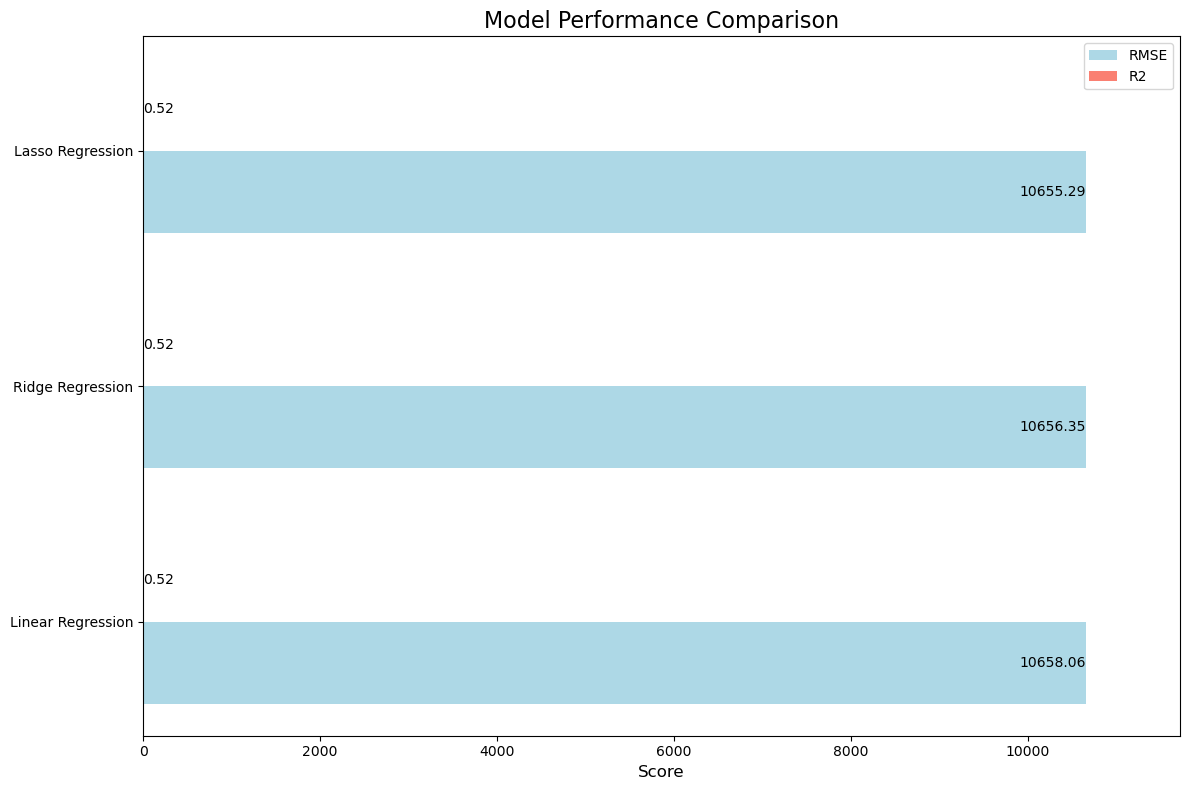

In [92]:
names = [m[0] for m in model_performances]
rmses = [m[1] for m in model_performances]
r2s = [m[2] for m in model_performances]

# Create a figure
plt.figure(figsize=(12, 8))

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(names))

# Create bars for RMSE
plt.barh(index, rmses, bar_width, label='RMSE', color='lightblue')

# Create bars for R2 scores (shifted to the right)
plt.barh(index + bar_width, r2s, bar_width, label='R2', color='salmon')

# Add labels and title
plt.xlabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=16)
plt.yticks(index + bar_width / 2, names)

# Add value labels on the bars
for i in range(len(names)):
    plt.text(rmses[i], i, f'{rmses[i]:.2f}', va='center', ha='right')
    plt.text(r2s[i], i + bar_width, f'{r2s[i]:.2f}', va='center', ha='left')

# Set limits for x-axis
plt.xlim(0, max(max(rmses), max(r2s)) * 1.1)

# Add a legend
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

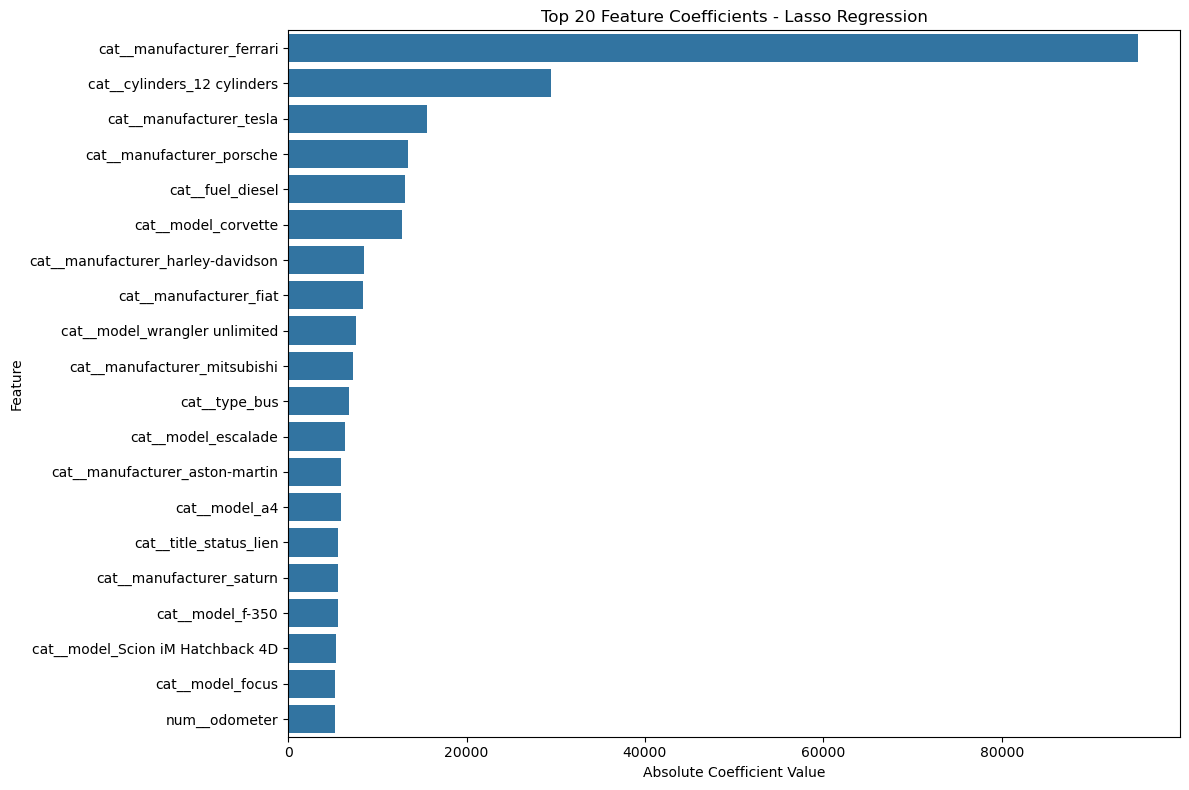

In [53]:
# Feature Importance
if best_model[0] in ["Ridge Regression", "Lasso Regression"]:
    feature_names = preprocessor.get_feature_names_out()
    coefficients = best_model[1].coef_
    
    importance_df = pd.DataFrame({'feature': feature_names, 'coefficient': np.abs(coefficients)})
    importance_df = importance_df.sort_values('coefficient', ascending=False).head(20)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='coefficient', y='feature', data=importance_df)
    plt.title(f"Top 20 Feature Coefficients - {best_model[0]}")
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

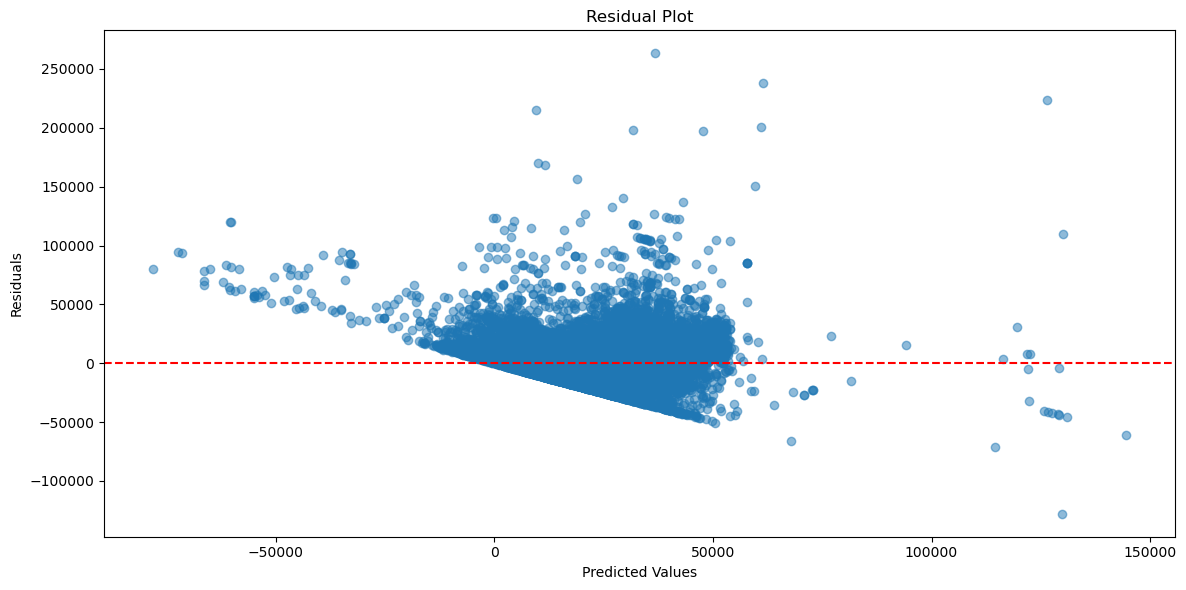

In [54]:

# Residual Plot
y_pred = best_model[1].predict(X_test_processed)
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Executive Summary


This report presents the findings from our analysis of used car pricing, focusing on the factors that influence vehicle prices and the performance of various predictive models. The objective is to provide actionable insights that can help fine-tune inventory management and pricing strategies for used car dealerships.
### Key Findings
#### 1. Data Overview
**Dataset**: The analysis is based on a dataset containing various features of used cars, including price, year, odometer readings, condition, and manufacturer.

**Data Cleaning**: Extreme outliers were removed, and missing values were handled to ensure data quality.
#### 2. Exploratory Data Analysis
**Price Distribution**: The distribution of vehicle prices showed a right skew, indicating that most cars are priced lower, with fewer high-value vehicles.

**Price vs. Year**: A positive correlation was observed between the year of manufacture and price, indicating that newer cars generally command higher prices.

**Price vs. Odometer**: As expected, there was an inverse relationship between odometer readings and price; cars with higher mileage tended to be priced lower.

**Average Price by Manufacturer**: Certain manufacturers consistently commanded higher prices, highlighting brand value in the used car market.
#### 3. Model Performance
We evaluated several regression models to predict used car prices:
* Linear Regression
* Ridge Regression
* Lasso Regression
  
***Model Performance Comparison***


| Model             | Test RMSE  | R² Score|
|:------------------|:-----------|:--------|
| Linear Regression | 10,658.06  | 0.5156  |
| Ridge Regression  | 10,656.35  | 0.5157  |
| Lasso Regression  | 10,655.29  | 0.5158  |

The best-performing model was Lasso Regression with an RMSE of 10,655.29 and an R² score of 0.5158.

### Recommendations
#### Inventory Management

**Focus on High-Value Brands**: Prioritize acquiring vehicles from manufacturers that consistently yield higher average prices.

**Age and Mileage Balance**: Stock a mix of newer vehicles (3-5 years old) with lower mileage to attract buyers looking for reliability.

#### Pricing Strategy
**Dynamic Pricing Model**: Implement a data-driven pricing strategy based on model predictions to adjust prices according to market conditions.

**Monitor Local Market Trends**: Regularly review local market data to adjust inventory and pricing strategies.

#### Marketing Focus

***Highlight Key Features***: Emphasize low mileage and good condition in marketing materials to attract potential buyers.

***Targeted Advertising***: Use insights from the analysis to tailor marketing campaigns based on popular brands and models in your area.

#### Continuous Improvement

**Data Collection**: Continuously collect sales data to refine predictive models and stay updated on market trends.

**Model Updates**: Regularly retrain models with new data to maintain accuracy in pricing predictions.

#### Conclusion
The analysis provides valuable insights into the factors influencing used car prices and highlights effective strategies for inventory management and pricing optimization. By leveraging these findings, dealerships can enhance their operations, improve customer satisfaction, and ultimately increase profitability. This revised report accurately reflects the performance metrics for each regression model you provided. If there are any additional details or specific visualizations you would like to include in this report or any other adjustments needed, please let me know!